In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Step 1: Importing Data

In [12]:
retail=pd.read_csv("OnlineRetail.csv", encoding="unicode_escape")

#to escape the different encoding in the csv file

Using file path to read csv:

r'C:\...  .csv'

In [13]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [15]:
retail.shape

(541909, 8)

In [16]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [17]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Step 2: Cleaning Data


In [18]:
#count of null values

retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [19]:
#null values as a percentage of the total

round((retail.isna().sum()/retail.shape[0]*100),2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [20]:
retail.head(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [21]:
#dropping the null values

retail.dropna(inplace=True)
retail.shape

(406829, 8)

In [22]:
retail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [23]:
#converting customerID to an object

retail.loc[:,'CustomerID']=retail.loc[:,'CustomerID'].astype(str)

In [24]:
retail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

# Step 3: Data Preparation

We are going to analyze the customers based on below 3 factors:

* R (Recency): Number of days since last purchase of customer. 
* F (Frequency): Number of transactions of customers. 
* M (Monetary): Total amount of transactions (revenue contributed by each customer).


In [26]:
#Amount spent in each transaction

retail["Amount"]=retail.Quantity*retail.UnitPrice
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [28]:
#Sum of transactions for a particular customerid

#grouping based on customerid

rfm_m=retail.groupby("CustomerID")["Amount"].sum()
rfm_m.head()

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
Name: Amount, dtype: float64

In [29]:
retail.groupby("CustomerID")["Amount"].size()

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     13
18283.0    756
18287.0     70
Name: Amount, Length: 4372, dtype: int64

In [30]:
#Monetary Dataframe

m=pd.DataFrame(rfm_m)
m.reset_index(inplace=True)
m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [33]:
#for no. of transactions by a customer

#grouping only by customerId
r_in=retail.groupby("CustomerID")["InvoiceNo"].count()
r_in.head()

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
Name: InvoiceNo, dtype: int64

In [34]:
retail[retail["CustomerID"]=="12347.0"]["InvoiceNo"].unique()
#Only 7 vs 182
#Mismatch because there is a repetition of invoice nos.

array(['537626', '542237', '549222', '556201', '562032', '573511',
       '581180'], dtype=object)

In [42]:
#grouping for frequency

rfm_f=retail.groupby(["CustomerID","InvoiceNo"]).size()
rfm_f


CustomerID  InvoiceNo
12346.0     541431        1
            C541433       1
12347.0     537626       31
            542237       29
            549222       24
                         ..
18283.0     579673       52
            580872       50
18287.0     554065       29
            570715       38
            573167        3
Length: 22190, dtype: int64

In [43]:
#grouping again to aggregate the count of the levels

rfm_f=retail.groupby(["CustomerID","InvoiceNo"]).size().groupby(level=0).count()
rfm_f

CustomerID
12346.0     2
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     3
18283.0    16
18287.0     3
Length: 4372, dtype: int64

In [44]:
#Frequency Dataframe

f=pd.DataFrame(rfm_f)
f.reset_index(inplace=True)
f.head()

,CustomerID,0
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [46]:
#Merging monetary and frequency dataframes

rfm=pd.merge(m,f,on="CustomerID", how="inner")
#inner join-only common column data is merged
rfm.columns=["CustomerID","Amount","Frequency"]
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,7
2,12348.0,1797.24,4
3,12349.0,1757.55,1
4,12350.0,334.40,1


In [47]:
#For recency

retail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
Amount         float64
dtype: object

In [50]:
#change invoice date to datetime

retail["InvoiceDate"]=pd.to_datetime(retail["InvoiceDate"],format="%m/%d/%Y %H:%S")
retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
Amount                float64
dtype: object

In [52]:
#finding max date of invoicedate

max_date=max(retail["InvoiceDate"])
max_date

Timestamp('2011-12-09 12:00:50')

In [53]:
#column for recency

retail["DIFF"]=max_date-retail["InvoiceDate"]
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,DIFF
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:00:26,2.55,17850.0,United Kingdom,15.30,373 days 04:00:24
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:00:26,3.39,17850.0,United Kingdom,20.34,373 days 04:00:24
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:00:26,2.75,17850.0,United Kingdom,22.00,373 days 04:00:24
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:00:26,3.39,17850.0,United Kingdom,20.34,373 days 04:00:24
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:00:26,3.39,17850.0,United Kingdom,20.34,373 days 04:00:24


In [55]:
#Minimum- to get the highest recency (less diff) for each custID

rfm_r=retail.groupby("CustomerID")["DIFF"].min()
rfm_r

CustomerID
12346.0   325 days 02:00:33
12347.0     1 days 20:59:58
12348.0    74 days 23:00:37
12349.0    18 days 02:59:59
12350.0   309 days 20:00:49
                 ...       
18280.0   277 days 02:59:58
18281.0   180 days 01:59:57
18282.0     7 days 01:00:07
18283.0     3 days 00:00:48
18287.0    42 days 03:00:21
Name: DIFF, Length: 4372, dtype: timedelta64[ns]

In [56]:
#Recency Dataframe

r=pd.DataFrame(rfm_r)
r.reset_index(inplace=True)
r.head()

,CustomerID,DIFF
0,12346.0,325 days 02:00:33
1,12347.0,1 days 20:59:58
2,12348.0,74 days 23:00:37
3,12349.0,18 days 02:59:59
4,12350.0,309 days 20:00:49


In [57]:
#to remove time

r["Recency"]=r["DIFF"].dt.days
r.head()

,CustomerID,DIFF,Recency
0,12346.0,325 days 02:00:33,325
1,12347.0,1 days 20:59:58,1
2,12348.0,74 days 23:00:37,74
3,12349.0,18 days 02:59:59,18
4,12350.0,309 days 20:00:49,309


In [64]:
#dropping the diff column

r.drop(["DIFF"],axis=1,inplace=True)

#specify the index of the column as axis

r.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [65]:
#merging recency with the previous rfm

rfm=pd.merge(rfm,r,on="CustomerID", how="inner")
#inner join-only common column data is merged

rfm.columns=["CustomerID","Amount","Frequency","Recency"]
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,7,1
2,12348.0,1797.24,4,74
3,12349.0,1757.55,1,18
4,12350.0,334.40,1,309


# Scaling/Data Normalization

In [66]:
rfm_df=rfm[["Amount","Frequency","Recency"]]
#Not for custid

scaler=StandardScaler() #imported

rfm_df_scaled=scaler.fit_transform(rfm_df)
rfm_df_scaled

array([[-0.23100099, -0.32936215,  2.32202285],
       [ 0.29343167,  0.20610242, -0.89373323],
       [-0.01231622, -0.11517632, -0.1691956 ],
       ...,
       [-0.20951263, -0.22226923, -0.83418219],
       [ 0.02390005,  1.16993863, -0.87388289],
       [-0.00744423, -0.22226923, -0.48680114]])

# Step 4: Building the Model

In [67]:
#Elbow method: for the optimal no. of clusters

ssd=[]  #sum of the square of distances of the datapoints

range_cluster=[2,3,4,5,6,7,8]
for i in range_cluster:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(rfm_df_scaled)
    ssd.append(kmeans.inertia_)
ssd

[9134.689127794294,
 5527.229730792318,
 4046.284922350952,
 3019.5642322202098,
 2383.3046736666106,
 1905.9090919834555,
 1585.3695182134436]

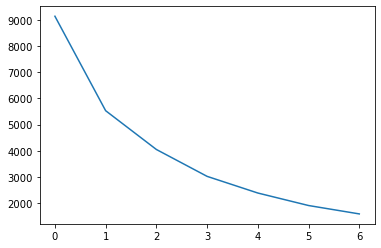

In [68]:
#plotting to find the elbow

plt.plot(ssd)

#here in the x-axis, 0 corresponds 2, 1 to 3 and so on....
#elbow is at 3

In [69]:
#Assignining no. of clusters as 3

kmeans=KMeans(n_clusters=3)
kmeans.fit(rfm_df_scaled)

KMeans(n_clusters=3)

In [70]:
#find labels as it is unsupervised

kmeans.labels_

array([1, 0, 0, ..., 0, 0, 0])

In [71]:
#Assigning the labels to the rfm df

rfm["Label"]=kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Label
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,7,1,0
2,12348.0,1797.24,4,74,0
3,12349.0,1757.55,1,18,0
4,12350.0,334.40,1,309,1


In [72]:
rfm["Label"].unique()

array([1, 0, 2])

In [73]:
rfm.columns=["CustomerID","Amount","Frequency","Recency","Cluster_ID"]

<AxesSubplot:xlabel='Cluster_ID', ylabel='Amount'>

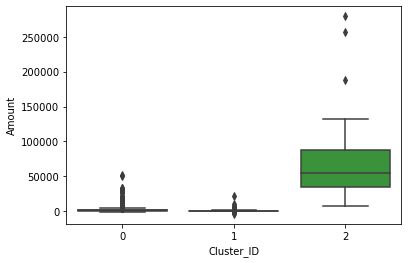

In [74]:
#Boxplotting for Monetary

sns.boxplot(x="Cluster_ID",y="Amount",data=rfm)

#There are outliers

<AxesSubplot:xlabel='Cluster_ID', ylabel='Frequency'>

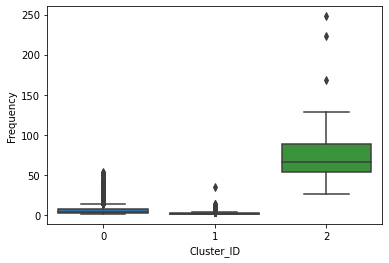

In [75]:
#For frequency

sns.boxplot(x="Cluster_ID",y="Frequency",data=rfm)

<AxesSubplot:xlabel='Cluster_ID', ylabel='Recency'>

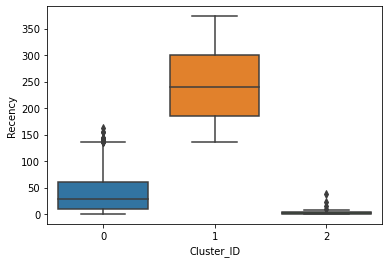

In [76]:
#For Recency

sns.boxplot(x="Cluster_ID",y="Recency",data=rfm)


Comparing the plots:

*Customers with high recency (less diff in days) i.e.Cluster-2 have spent more and were more frequent.
*So, Cluster-2 is very important for the company.

In [77]:
#A list of cluster no.2 customers

imp_cust=rfm[rfm["Cluster_ID"]==2]
imp_cust

,CustomerID,Amount,Frequency,Recency,Cluster_ID
55,12415.0,123725.45,26,23,2
330,12748.0,29072.10,224,0,2
487,12971.0,10930.26,89,3,2
568,13089.0,57385.88,118,2,2
803,13408.0,27487.41,81,1,2
1005,13694.0,62653.10,60,3,2
1078,13798.0,36351.42,63,0,2
1300,14096.0,57120.91,34,3,2
1345,14156.0,113384.14,66,9,2
1447,14298.0,50862.44,45,2,2


In [78]:
imp_cust.shape

#25 important customers

(25, 5)

# Conclusion

* People who belong to cluster 2 have spent more than the people belonging to other clusters, followed by cluster 1.
* People who belong to cluster 2 have visited more than the people belonging to other clusters, followed by cluster 1.
* People belonging to cluster 2 are the customers with most recent visits, followed by cluster 1.

* The Retail company should focus more on the people who belong to cluster 2.